<a href="https://colab.research.google.com/github/ali-workshop/Bank_Risk_Assesment_System_using_Artificaile_Intellegnece_AI_RAS/blob/main/AI_RAS_bank_risk_assesment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# import libraries and packages

In [ ]:
# Install necessary packages for feature engineering and CatBoost
!pip install feature_engine  # Install feature_engine package
!pip install catboost  # Install catboost package
# Import required libraries for data manipulation, visualization, and modeling
import numpy as np  # Numerical computing library for array operations
import re  # Import regular expression module
from sklearn.metrics import (classification_report, accuracy_score, precision_score, recall_score,
                             f1_score, roc_auc_score)  # Import metrics for model evaluation
from sklearn.metrics import ConfusionMatrixDisplay, PrecisionRecallDisplay, RocCurveDisplay  # Import display functions for metrics
from yellowbrick.classifier import ClassPredictionError  # Import ClassPredictionError for visualizing prediction errors
import pandas as pd  # Data manipulation library for data analysis
import plotly.tools as tls  # Tools for creating Plotly plots
import statsmodels.api as sm  # Statistical modeling library for statistical analysis
import matplotlib.pyplot as plt  # Plotting library for creating static, interactive, and animated visualizations
import seaborn as sns  # Statistical data visualization library based on Matplotlib
import plotly.offline as py  # Offline version of Plotly for creating and sharing interactive plots
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier  # Ensemble learning methods for classification tasks
from sklearn.svm import SVC  # Support vector machine algorithm for classification tasks
from scipy.stats import uniform, randint  # Continuous and discrete random variable distributions
from sklearn import model_selection, linear_model, metrics  # Model selection, linear models, and evaluation metrics
from sklearn.metrics import auc, accuracy_score, confusion_matrix, roc_auc_score, classification_report  # Various evaluation metrics
from sklearn.tree import DecisionTreeClassifier  # Decision tree algorithm for classification tasks
from sklearn.linear_model import LogisticRegression  # Logistic regression algorithm for classification tasks
from sklearn.neighbors import KNeighborsClassifier  # k-nearest neighbors algorithm for classification tasks
from sklearn.model_selection import GridSearchCV, KFold, RandomizedSearchCV, train_test_split  # Hyperparameter tuning and cross-validation utilities
import plotly.express as px  # High-level interface for creating expressive and interactive plots
import plotly.graph_objects as go  # Lower-level interface for creating plots with Plotly
from plotly.subplots import make_subplots  # Create subplots in Plotly
from plotly.offline import init_notebook_mode  # Initialize Plotly for offline usage
from sklearn.preprocessing import LabelEncoder  # Encode categorical features into numerical values
import warnings, gc  # Suppress warnings and manage memory usage
from sklearn.preprocessing import StandardScaler  # Standardize features by removing the mean and scaling to unit variance
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, PrecisionRecallDisplay, RocCurveDisplay  # Various evaluation metrics for classification tasks
from scipy.stats import probplot  # Probability plot - a graphical method for comparing two probability distributions
from feature_engine.outliers import Winsorizer  # Handle outliers in data preprocessing
from feature_engine.selection import DropConstantFeatures, DropCorrelatedFeatures, DropDuplicateFeatures  # Feature selection techniques
from sklearn.pipeline import Pipeline  # Chain multiple processing steps into a single pipeline
from xgboost import XGBClassifier, XGBRFClassifier  # Extreme Gradient Boosting (XGBoost) models for classification tasks
from catboost import CatBoostClassifier  # Gradient boosting library for machine learning tasks
from lightgbm import LGBMClassifier  # LightGBM - a gradient boosting framework that uses tree-based learning algorithms
from imblearn.over_sampling import BorderlineSMOTE  # Oversampling technique for handling imbalanced datasets
from collections import Counter  # Counter class for counting hashable objects
import zipfile  # Module for reading and writing ZIP files
import os  # Operating system interface for interacting with the underlying operating system
from yellowbrick.classifier import ClassPredictionError  # Visualize classification errors for a classifier

# Suppress warnings
warnings.filterwarnings("ignore")


#Load and UnZip the dataset

In [ ]:
# Path to the ZIP file
zip_file_path = '/content/archive.zip'  # Define the path to the ZIP file
extract_dir = '/content/'  # Define the directory where the ZIP file will be extracted
os.makedirs(extract_dir, exist_ok=True)  # Create the directory if it does not exist
with zipfile.ZipFile(zip_file_path, 'r') as zf:  # Open the ZIP file in read mode
    zf.extractall(extract_dir)  # Extract all files from the ZIP file to the extraction directory
print("Extraction complete.")  # Print message indicating extraction completion


Extraction complete.


#Read Dataset

In [ ]:
data = pd.read_csv("/content/credit_risk_dataset.csv")  # Read the CSV file into a pandas DataFrame


#Print the first 10 linesof the data

In [ ]:
# Display the first few rows of the dataset
data.head(10)

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
5,21,9900,OWN,2.0,VENTURE,A,2500,7.14,1,0.25,N,2
6,26,77100,RENT,8.0,EDUCATION,B,35000,12.42,1,0.45,N,3
7,24,78956,RENT,5.0,MEDICAL,B,35000,11.11,1,0.44,N,4
8,24,83000,RENT,8.0,PERSONAL,A,35000,8.90,1,0.42,N,2
9,21,10000,OWN,6.0,VENTURE,D,1600,14.74,1,0.16,N,3


#print the last 10 lines of the data

In [ ]:
# Display the last ten rows of the dataset
data.tail(10)

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
32571,60,45600,RENT,1.0,VENTURE,B,20000,10.00,1,0.44,N,26
32572,52,52000,OWN,0.0,PERSONAL,A,9600,8.49,0,0.18,N,22
32573,56,90000,MORTGAGE,0.0,PERSONAL,A,7200,6.17,0,0.08,N,19
32574,52,65004,RENT,4.0,PERSONAL,D,20000,15.58,1,0.31,Y,19
32575,52,64500,RENT,0.0,EDUCATION,B,5000,11.26,0,0.08,N,20
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26
32580,66,42000,RENT,2.0,MEDICAL,B,6475,9.99,0,0.15,N,30


#start Explore the dataset

#print the Length and the shape of our data

In [ ]:
# Print the length of the dataset
print(f"the length of the data is {len(data)}")

# Print the shape of the dataset
print(f"the shape of the data is: {data.shape}")


the length of the data is 32581
the shape of the data is: (32581, 12)


#print the Describtion of the data

In [ ]:
# Generate descriptive statistics for the dataset
data.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


#Print the information of the data

In [ ]:
# Display concise summary of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


#Print the number of null values in each columns

In [ ]:
# Count the number of missing values in each column of the dataset
data.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

#print the number of the unique values in each column

In [ ]:
# Count the number of unique values in each column of the dataset
data.nunique()

person_age                      58
person_income                 4295
person_home_ownership            4
person_emp_length               36
loan_intent                      6
loan_grade                       7
loan_amnt                      753
loan_int_rate                  348
loan_status                      2
loan_percent_income             77
cb_person_default_on_file        2
cb_person_cred_hist_length      29
dtype: int64

#plot the distribution of the label in the dataset

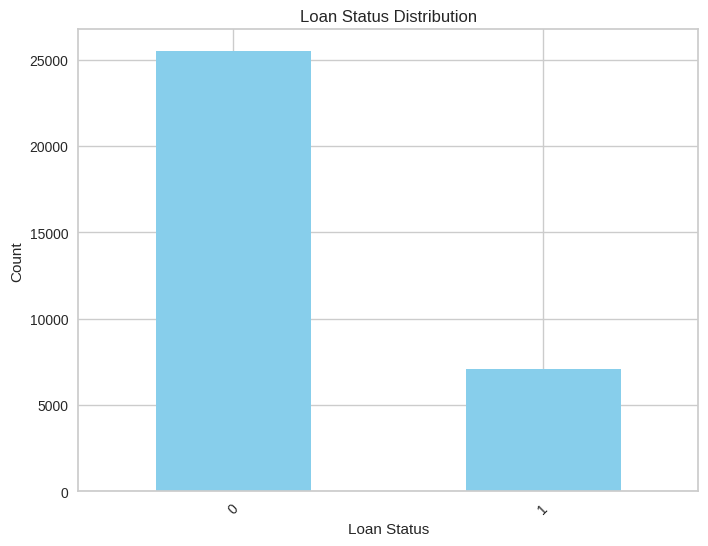

In [ ]:
# Create a DataFrame with loan status counts
loan_status_counts = data['loan_status'].value_counts()
# Plotting the bar plot
plt.figure(figsize=(8, 6))  # Set the figure size
loan_status_counts.plot(kind='bar', color='skyblue')  # Plot a bar plot
plt.title('Loan Status Distribution')  # Set the title of the plot
plt.xlabel('Loan Status')  # Set the label for the x-axis
plt.ylabel('Count')  # Set the label for the y-axis
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()  # Display the plot

#Bie plot for target distribution

In [ ]:
def plot_target_distribution(data):
    """
    Function to plot the distribution of target variable.

    Parameters:
    - data: DataFrame containing the target variable.

    Returns:
    - None
    """

    # Define layout settings for the plot
    layout_settings = dict(
        layout=go.Layout(
            font=dict(family="Franklin Gothic", size=12),
            height=500,
            width=1000
        )
    )

    # Calculate normalized value counts of the target variable
    target = data['loan_status'].value_counts(normalize=True)
    target.rename(index={1:'Default', 0:'Non-default'}, inplace=True)

    # Define palette and colors
    palette, colors = ['#016CC9', '#DEB078'], ['#8DBAE2', '#EDD3B3']

    # Create a new figure
    fig = go.Figure()

    # Add a Pie trace to the figure
    fig.add_trace(go.Pie(
        labels=target.index,
        values=target * 100,
        hole=0.45,
        showlegend=True,
        sort=False,
        marker=dict(
            colors=colors,
            line=dict(color=palette, width=2.5)
        ),
        hovertemplate="%{label} Accounts: %{value:.2f}%<extra></extra>"
    ))

    # Update layout of the figure
    fig.update_layout(
        template=layout_settings,
        title='Target Distribution',
        legend=dict(traceorder='reversed', y=1.05, x=0),
        uniformtext_minsize=15,
        uniformtext_mode='hide',
        width=700
    )

    # Show the plot
    fig.show()

# Call the function with your DataFrame
plot_target_distribution(data)

#print the number of duplicated values in the dataset

In [ ]:
# Count the number of duplicated rows in the dataset
data.duplicated().sum()

165

#Print the correlation matrix in the dataset

In [ ]:
# Compute pairwise correlation of columns, excluding NA/null values
data.corr()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
person_age,1.000000,0.173202,0.163106,0.050787,0.012580,-0.021629,-0.042411,0.859133
person_income,0.173202,1.000000,0.134268,0.266820,0.000792,-0.144449,-0.254471,0.117987
person_emp_length,0.163106,0.134268,1.000000,0.113082,-0.056405,-0.082489,-0.054111,0.144699
loan_amnt,0.050787,0.266820,0.113082,1.000000,0.146813,0.105376,0.572612,0.041967
loan_int_rate,0.012580,0.000792,-0.056405,0.146813,1.000000,0.335133,0.120314,0.016696
loan_status,-0.021629,-0.144449,-0.082489,0.105376,0.335133,1.000000,0.379366,-0.015529
loan_percent_income,-0.042411,-0.254471,-0.054111,0.572612,0.120314,0.379366,1.000000,-0.031690
cb_person_cred_hist_length,0.859133,0.117987,0.144699,0.041967,0.016696,-0.015529,-0.031690,1.000000


#plot the correlation matrix in the dataset

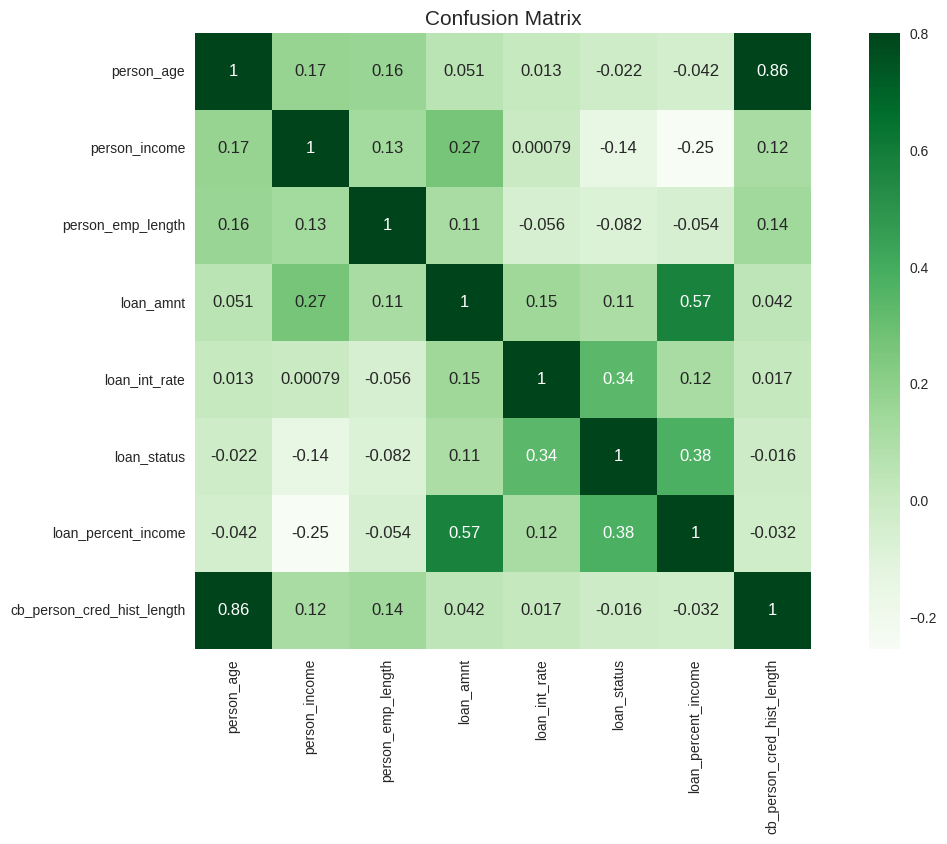

In [ ]:
def plot_heatmap_correlation(data):
    """
    Function to plot a heatmap of correlation matrix.

    Parameters:
    - data: DataFrame containing the dataset.

    Returns:
    - None
    """

    # Create subplots
    fig, ax = plt.subplots()

    # Set figure size
    fig.set_size_inches(15, 8)

    # Generate heatmap of correlation matrix
    sns.heatmap(data.corr(), vmax=0.8, square=True, annot=True, cmap='Greens')

    # Set title for the plot
    plt.title('Confusion Matrix', fontsize=15)

    # Show the plot
    plt.show()

# Call the function with your DataFrame
plot_heatmap_correlation(data)


#Visualize the Loan grad distribution

In [ ]:
def plot_loan_grade_pie(data):
    """
    Function to plot a pie chart of loan grade distribution.

    Parameters:
    - data: DataFrame containing the dataset.

    Returns:
    - None
    """

    # Compute loan grade counts
    level_counts = data['loan_grade'].value_counts()

    # Create a pie chart using Plotly
    fig = px.pie(
        values=level_counts.values,
        names=level_counts.index,
        color_discrete_sequence=px.colors.sequential.Mint,
        title='Loan Grade'
    )

    # Update trace properties
    fig.update_traces(
        textinfo='label+percent+value',
        textfont_size=13,
        marker=dict(line=dict(color='#102000', width=0.2))
    )

    # Update marker line width and color
    fig.data[0].marker.line.width = 2
    fig.data[0].marker.line.color = 'gray'

    # Show the plot
    fig.show()

# Call the function with your DataFrame
plot_loan_grade_pie(data)


#print the highest correlated cols.

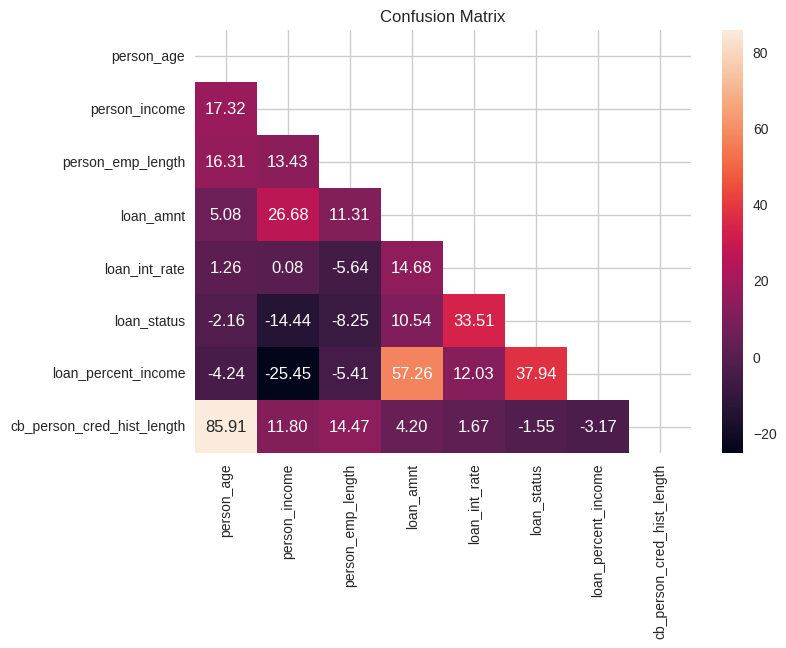

['cb_person_cred_hist_length']

In [ ]:
def find_highly_correlated_columns(dataframe, plot=False, corr_threshold=0.70):
    """
    Function to find columns with high correlation.

    Parameters:
    - dataframe: DataFrame containing the dataset.
    - plot: Boolean indicating whether to plot the correlation matrix.
    - corr_threshold: Threshold value for correlation.

    Returns:
    - drop_list: List of column names with high correlation.
    """

    # Select only the numeric columns from the DataFrame
    numeric_dataframe = dataframe.select_dtypes(include=['number'])

    # Compute correlation matrix
    corr = numeric_dataframe.corr()
    cor_matrix = corr.abs()

    # Exclude lower triangle matrix
    upper_triangle_matrix = cor_matrix.where(np.triu(np.ones(cor_matrix.shape), k=1).astype(bool))

    # Find columns with correlation above the threshold
    drop_list = [col for col in upper_triangle_matrix.columns if any(upper_triangle_matrix[col] > corr_threshold)]

    # Plot correlation matrix if plot is True
    if plot:
        mask = np.zeros_like(corr)
        mask[np.triu_indices_from(mask)] = True
        sns.heatmap(corr * 100, annot=True, fmt='.2f', mask=mask)
        plt.title('Confusion Matrix')
        plt.show()

    return drop_list

# Usage example:
find_highly_correlated_columns(data, plot=True)

##plot with three histograms showing the age distribution for different loan statuses. It provides a visual comparison between the age distributions of individuals with "good" and "bad" loan statuses, as well as the overall age distribution.

In [ ]:
def plot_age_distribution(data):
    """
    Function to plot the age distribution based on loan status.

    Parameters:
    - data: DataFrame containing the dataset.

    Returns:
    - None
    """

    # Extract age data for good loan status
    df_good = data.loc[data["loan_status"] == 1]['person_age'].values.tolist()

    # Extract age data for bad loan status
    df_bad = data.loc[data["loan_status"] == 0]['person_age'].values.tolist()

    # Extract overall age data
    df_age = data['person_age'].values.tolist()

    # Create first histogram trace for good loan status with yellow color
    trace0 = go.Histogram(
        x=df_good,
        histnorm='probability',
        name="Loan status = 1",
        marker=dict(color='yellow')
    )

    # Create second histogram trace for bad loan status with red color
    trace1 = go.Histogram(
        x=df_bad,
        histnorm='probability',
        name="Loan status = 0",
        marker=dict(color='red')
    )

    # Create third histogram trace for overall age with green color
    trace2 = go.Histogram(
        x=df_age,
        histnorm='probability',
        name="Overall Age",
        marker=dict(color='green')
    )

    # Create subplot grid
    fig = tls.make_subplots(rows=2, cols=2, specs=[[{}, {}], [{'colspan': 2}, None]],
                            subplot_titles=('Good', 'Bad', 'General Distribution'))

    # Add traces to the subplot grid
    fig.append_trace(trace0, 1, 1)
    fig.append_trace(trace1, 1, 2)
    fig.append_trace(trace2, 2, 1)

    # Update layout settings
    fig['layout'].update(showlegend=True, title='Age Distribution', bargap=0.05)

    # Plot the figure
    py.iplot(fig, filename='custom-sized-subplot-with-subplot-titles')

# Call the function with your DataFrame
plot_age_distribution(data)


## bar chart where each group represents the distribution of housing ownership among individuals with different loan statuses

In [ ]:
def plot_housing_distribution(data):
    """
    Function to plot the housing distribution based on loan status.

    Parameters:
    - data: DataFrame containing the dataset.

    Returns:
    - None
    """

    # Filter data for loan status = 1
    data_loan_status_1 = data[data["loan_status"] == 1]

    # Filter data for loan status = 0
    data_loan_status_0 = data[data["loan_status"] == 0]

    # Calculate housing counts for loan status = 1
    housing_counts_1 = data_loan_status_1["person_home_ownership"].value_counts()

    # Calculate housing counts for loan status = 0
    housing_counts_0 = data_loan_status_0["person_home_ownership"].value_counts()

    # Create first bar plot trace for loan status = 1 with blue color
    trace0 = go.Bar(
        x=housing_counts_1.index.values,
        y=housing_counts_1.values,
        name='Loan status = 1',
        marker=dict(color='blue')
    )

    # Create second bar plot trace for loan status = 0 with green color
    trace1 = go.Bar(
        x=housing_counts_0.index.values,
        y=housing_counts_0.values,
        name="Loan status = 0",
        marker=dict(color='green')
    )

    # Combine the traces
    data_trace = [trace0, trace1]

    # Define layout settings
    layout = go.Layout(
        title='Housing Distribution'
    )

    # Create the figure
    fig = go.Figure(data=data_trace, layout=layout)

    # Plot the figure
    py.iplot(fig, filename='Housing-Grouped')

# Call the function with your DataFrame
plot_housing_distribution(data)


## bar chart where each group represents the distribution of Loan Grade among individuals with different loan statuses

In [ ]:
def plot_loan_grade_distribution(data):
    """
    Function to plot the loan grade distribution based on loan status.

    Parameters:
    - data: DataFrame containing the dataset.

    Returns:
    - None
    """

    # Create first bar plot trace for loan status = 1 with blue color
    trace0 = go.Bar(
        x=data[data["loan_status"] == 1]["loan_grade"].value_counts().index.values,
        y=data[data["loan_status"] == 1]["loan_grade"].value_counts().values,
        name='Loan status = 1',
        marker=dict(color='blue')
    )

    # Create second bar plot trace for loan status = 0 with green color
    trace1 = go.Bar(
        x=data[data["loan_status"] == 0]["loan_grade"].value_counts().index.values,
        y=data[data["loan_status"] == 0]["loan_grade"].value_counts().values,
        name="Loan status = 0",
        marker=dict(color='green')
    )

    # Combine the traces
    data_trace = [trace0, trace1]

    # Define layout settings
    layout = go.Layout(
        title='Loan Grade'
    )

    # Create the figure
    fig = go.Figure(data=data_trace, layout=layout)

    # Plot the figure
    py.iplot(fig, filename='Loan grade')

# Call the function with your DataFrame
plot_loan_grade_distribution(data)


## bar chart where each group represents the distribution of Loan intent among individuals with different loan statuses

In [ ]:
def plot_loan_intent_distribution(data):
    """
    Function to plot the loan intent distribution based on loan status.

    Parameters:
    - data: DataFrame containing the dataset.

    Returns:
    - None
    """

    # Create first bar plot trace for loan status = 1 with blue color
    trace0 = go.Bar(
        x=data[data["loan_status"] == 1]["loan_intent"].value_counts().index.values,
        y=data[data["loan_status"] == 1]["loan_intent"].value_counts().values,
        name='Loan status = 1',
        marker=dict(color='blue')
    )

    # Create second bar plot trace for loan status = 0 with orange color
    trace1 = go.Bar(
        x=data[data["loan_status"] == 0]["loan_intent"].value_counts().index.values,
        y=data[data["loan_status"] == 0]["loan_intent"].value_counts().values,
        name="Loan status = 0",
        marker=dict(color='orange')
    )

    # Combine the traces
    data_trace = [trace0, trace1]

    # Define layout settings
    layout = go.Layout(
        title='Loan Intent'
    )

    # Create the figure
    fig = go.Figure(data=data_trace, layout=layout)

    # Plot the figure
    py.iplot(fig, filename='Loan intent')

# Call the function with your DataFrame
plot_loan_intent_distribution(data)


#print the columns of the data before encoding

In [ ]:
print(data.columns)

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length'],
      dtype='object')


#Encode the categorical columns in data

In [ ]:
# Define threshold values for categorical and numerical-but-categorical features
cat_th = 10
car_th = 20

# Get all columns with categorical data types
cat_cols = [col for col in data.columns if data[col].dtypes == "O"]

# Find numerical-but-categorical features
num_but_cat = [col for col in data.columns if data[col].nunique() < cat_th and data[col].dtypes != "O"]

# Find categorical-but-continuous features
cat_but_car = [col for col in data.columns if data[col].nunique() > car_th and data[col].dtypes == "O"]

# Combine categorical columns and numerical-but-categorical columns
cat_cols = cat_cols + num_but_cat

# Remove categorical-but-continuous features
cat_cols = [col for col in cat_cols if col not in cat_but_car]

# Remove the target variable
cat_cols.remove("loan_status")

def one_hot_encoder(dataframe, categorical_cols, drop_first=False):
    """
    Perform one-hot encoding on categorical columns of the DataFrame.

    Parameters:
    - dataframe: DataFrame to perform one-hot encoding on.
    - categorical_cols: List of categorical columns.
    - drop_first: Whether to drop the first column of each one-hot encoded category.

    Returns:
    - DataFrame with one-hot encoded categorical columns.
    """
    # Perform one-hot encoding
    dataframe = pd.get_dummies(dataframe, columns=categorical_cols, drop_first=drop_first, dtype=int)
    return dataframe

# Apply one-hot encoding to the data
data = one_hot_encoder(data, cat_cols, drop_first=True)


#print the columns of the data after encoding

In [ ]:
print(data.columns)

Index(['person_age', 'person_income', 'person_emp_length', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_cred_hist_length', 'person_home_ownership_OTHER',
       'person_home_ownership_OWN', 'person_home_ownership_RENT',
       'loan_intent_EDUCATION', 'loan_intent_HOMEIMPROVEMENT',
       'loan_intent_MEDICAL', 'loan_intent_PERSONAL', 'loan_intent_VENTURE',
       'loan_grade_B', 'loan_grade_C', 'loan_grade_D', 'loan_grade_E',
       'loan_grade_F', 'loan_grade_G', 'cb_person_default_on_file_Y'],
      dtype='object')


#Preprocessing the data

##remove the null values

In [ ]:
data.dropna(inplace=True)

#define the features and the labels

In [ ]:
X = data.drop(['loan_status'], axis=1) # features
y = data['loan_status']  # labels

#use pipline for remove the constant and the duplicated

In [ ]:
from sklearn.pipeline import Pipeline  # Import Pipeline from sklearn.pipeline module
from feature_engine.selection import DropConstantFeatures, DropDuplicateFeatures  # Import feature selection methods

def feature_engineering_pipeline(X):
    """
    Perform feature engineering steps using a pipeline.

    Parameters:
    - X: DataFrame containing the features.

    Returns:
    - Transformed DataFrame after applying feature engineering steps.
    """

    # Define the pipeline with steps for dropping constant features and duplicates
    pipeline = Pipeline(steps=[
        ('constant', DropConstantFeatures()),  # Step to drop constant features
        ('duplicate', DropDuplicateFeatures())  # Step to drop duplicate features
    ])

    # Fit and transform the data using the pipeline
    X_transformed = pipeline.fit_transform(X)

    return X_transformed

# Apply feature engineering pipeline to the data
X = feature_engineering_pipeline(X)
X.shape


(28638, 22)

##Balancing the dataset using oversampling

In [ ]:
from imblearn.over_sampling import SMOTE, ADASYN, BorderlineSMOTE, SVMSMOTE

smote = BorderlineSMOTE()
X, y = smote.fit_resample(X, y)
print("Final dimensions of target label classes:", Counter(y))

Final dimensions of target label classes: Counter({1: 22435, 0: 22435})


# Plotting the bar plot after balancing

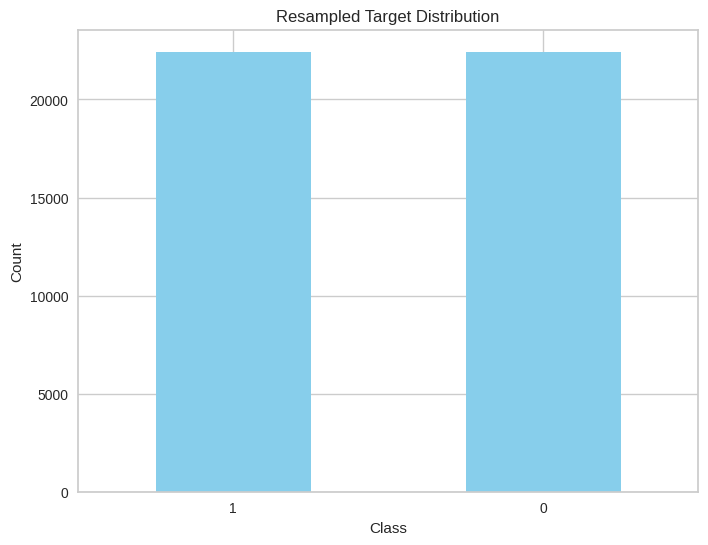

In [ ]:
# Create a DataFrame with the resampled target labels
resampled_counts = pd.Series(y).value_counts()
plt.figure(figsize=(8, 6))  # Set the figure size
resampled_counts.plot(kind='bar', color='skyblue')  # Plot a bar plot
plt.title('Resampled Target Distribution')  # Set the title of the plot
plt.xlabel('Class')  # Set the label for the x-axis
plt.ylabel('Count')  # Set the label for the y-axis
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
plt.show()  # Display the plot



# Plotting the pie plot


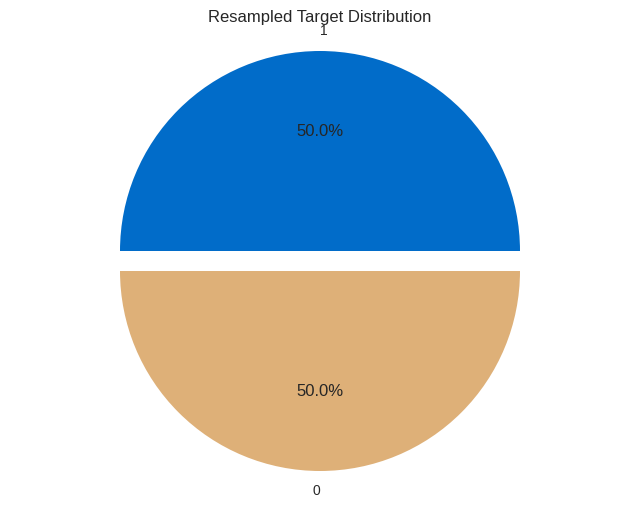

In [ ]:
plt.figure(figsize=(8, 6))  # Set the figure size
resampled_counts.plot(kind='pie', autopct='%1.1f%%', colors=['#016CC9', '#DEB078'], explode=(0, 0.1))  # Plot a pie plot
plt.title('Resampled Target Distribution')  # Set the title of the plot
plt.ylabel('')  # Remove the label for the y-axis
plt.axis('equal')  # Set the aspect ratio to be equal to make it a circle
plt.show()  # Display the plot


##split the data set into train and test

In [ ]:
# Import train_test_split function from sklearn.model_selection module
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
# X_train: Features for training
# X_test: Features for testing
# y_train: Target labels for training
# y_test: Target labels for testing
# test_size: Proportion of the dataset to include in the test split
# random_state: Controls the shuffling applied to the data before splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=42)


#scaling variables

In [ ]:
# Import StandardScaler from sklearn.preprocessing module
from sklearn.preprocessing import StandardScaler

# Instantiate StandardScaler
scaler = StandardScaler()

# Fit and transform the training features
scaled_train_X = scaler.fit_transform(X_train)

# Transform the testing features using the scaler fitted on the training data
scaled_test_X = scaler.transform(X_test)


#Start modeling

#Defne fuunction for train the models

In [ ]:

# Define empty lists to store evaluation metrics and models
eval_models = []
eval_accuracy_scores = []
eval_roc_auc_scores = []


def evaluate_model(model, X_train, X_test, y_train, y_test):
    # Train the model
    model.fit(X_train, y_train)

    # Predict on the test set
    y_pred = model.predict(X_test)

    print('-' * 50)

    # Display Confusion Matrix
    ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

    # Display Precision-Recall Curve
    PrecisionRecallDisplay.from_predictions(y_test, y_pred)

    # Display ROC Curve
    RocCurveDisplay.from_predictions(y_test, y_pred)

    # Calculate evaluation metrics
    acc = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred, average='macro')

    # Visualize class prediction error if the model is not CatBoost
    if re.search('catboost', str(model)) is None:
        visualizer = ClassPredictionError(model)
        visualizer.score(X_test, y_test)
        visualizer.show()
        del visualizer

    # Append evaluation metrics and model to lists
    eval_accuracy_scores.append(acc)
    eval_roc_auc_scores.append(roc_auc)
    eval_models.append(model)

    # Clean up memory
    del acc, roc_auc, y_pred
    gc.collect()


#Define the classifiers

In [ ]:
 # Define the hyperparameters for the CatBoost algorithm
params = {
    'learning_rate': 0.1,
    'depth':10,
    'iterations': 2000,
    }
CB=CatBoostClassifier(**params,silent=True,random_state=1)
LGBM=LGBMClassifier(verbose=-1,random_state=1)
RF=RandomForestClassifier(random_state=1)
Bagging=BaggingClassifier(random_state=1)

#Train the CatBoost classifier

--------------------------------------------------


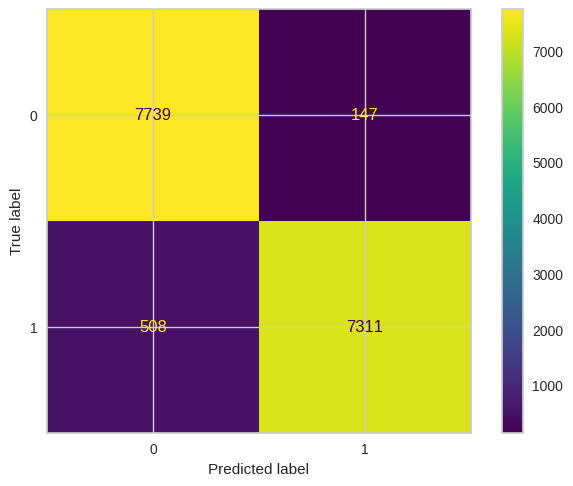

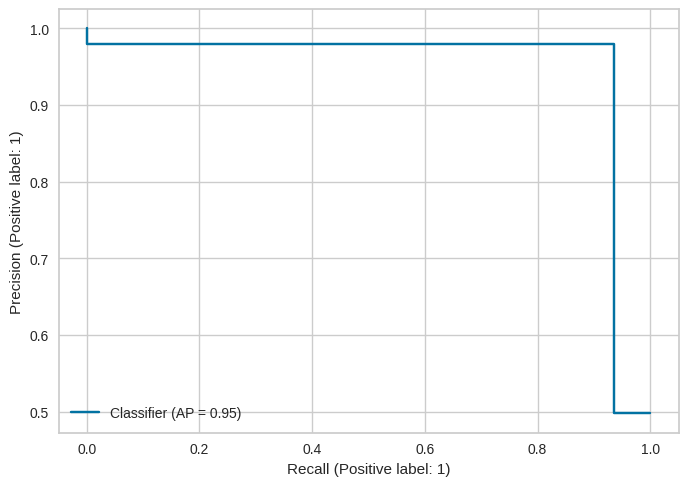

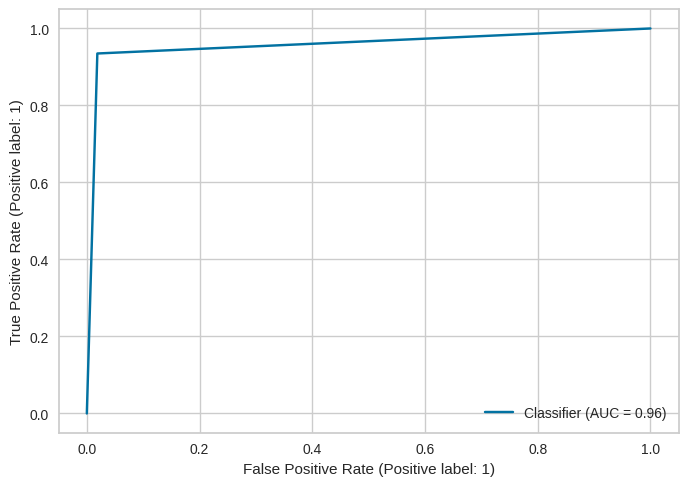

In [ ]:
evaluate_model(CB,X_train,X_test,y_train,y_test)

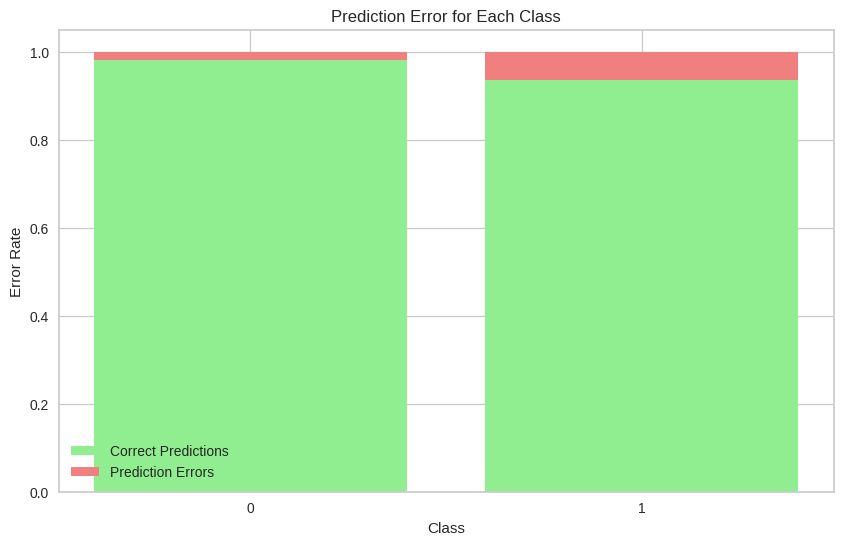

In [ ]:
# Make predictions on the test set
y_pred = CB.predict(X_test)

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Calculate error rates for each class
class_counts = np.sum(conf_matrix, axis=1)
class_errors = 1 - np.diag(conf_matrix) / class_counts.astype(float)

# Define colors for correct and incorrect predictions
correct_color = 'lightgreen'
error_color = 'lightcoral'

# Plot the bar plot
plt.figure(figsize=(10, 6))

# Plot correct predictions
plt.bar(np.arange(len(class_errors)), 1 - class_errors, color=correct_color, label='Correct Predictions')

# Plot prediction errors
plt.bar(np.arange(len(class_errors)), class_errors, bottom=1 - class_errors, color=error_color, label='Prediction Errors')

plt.xlabel('Class')
plt.ylabel('Error Rate')
plt.title('Prediction Error for Each Class')
plt.xticks(np.arange(len(class_errors)), np.unique(y_test))
plt.legend()
plt.show()

#Train the LGBMClassifier

--------------------------------------------------


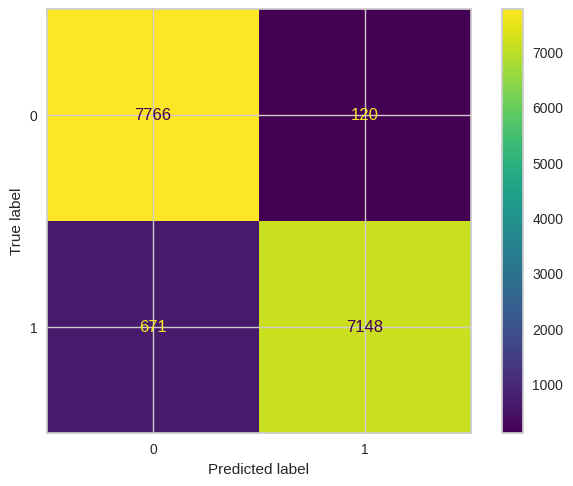

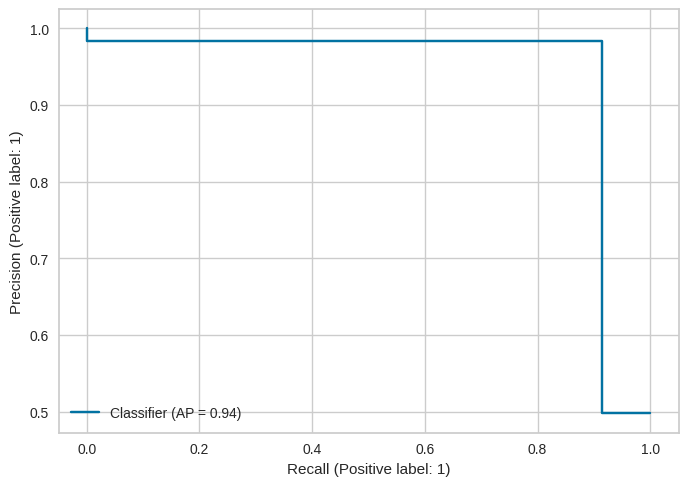

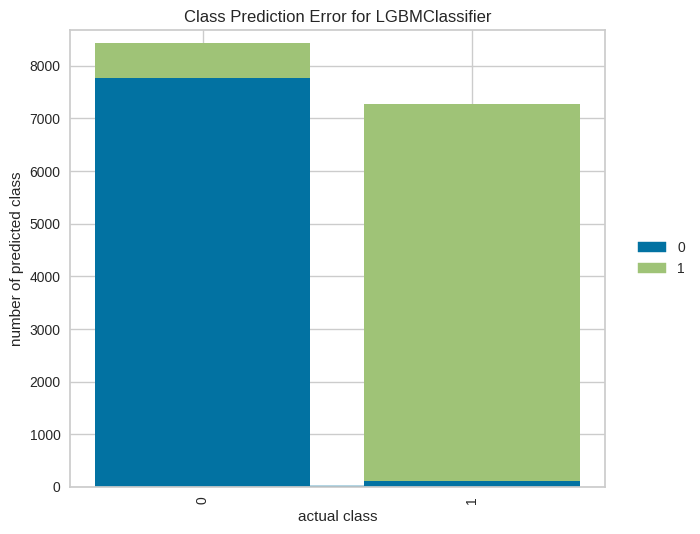

In [ ]:
evaluate_model(LGBM,X_train,X_test,y_train,y_test)

#Train the RandomForest classifier

--------------------------------------------------


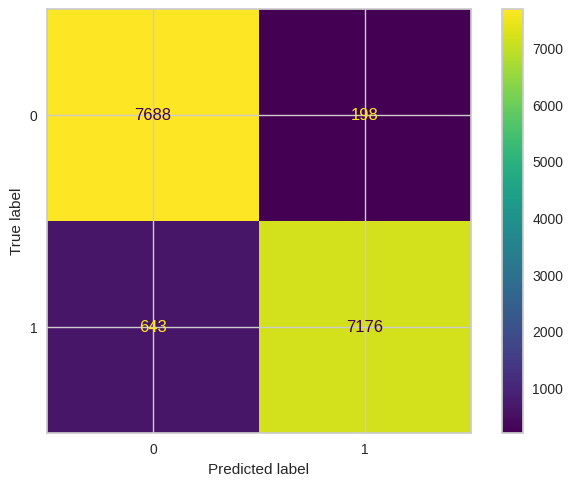

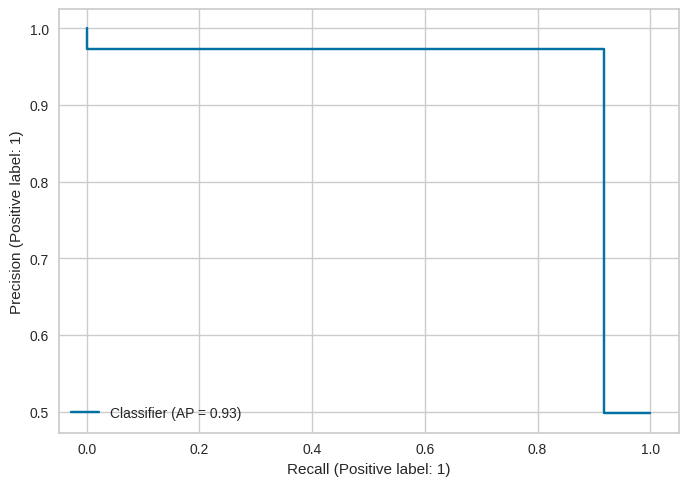

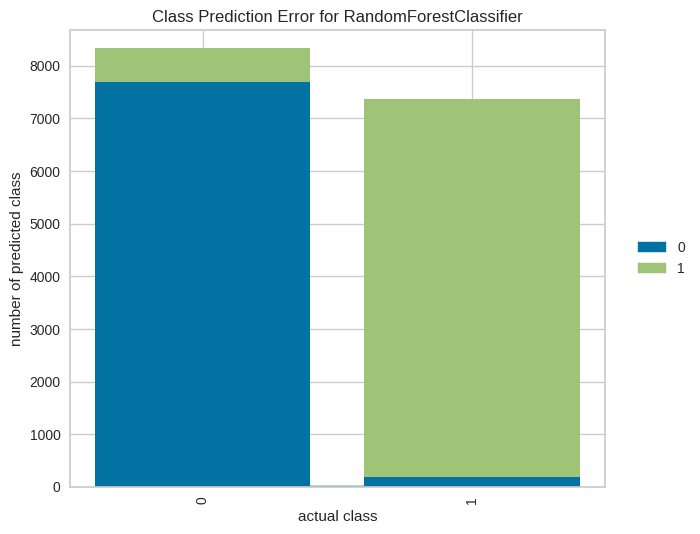

In [ ]:
from sklearn.ensemble import RandomForestClassifier
evaluate_model(RF,X_train,X_test,y_train,y_test)

#Train teh Bagging classifier

--------------------------------------------------


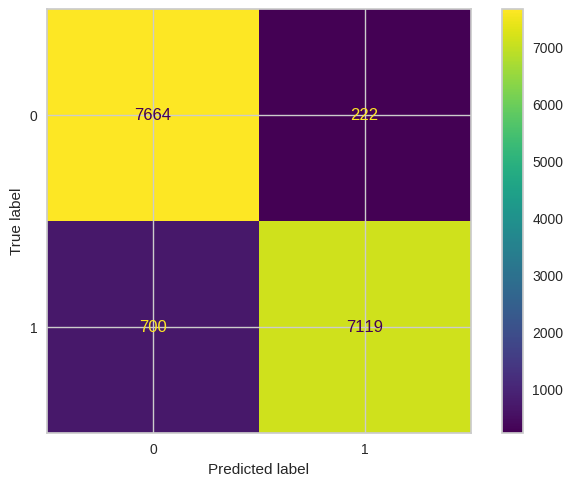

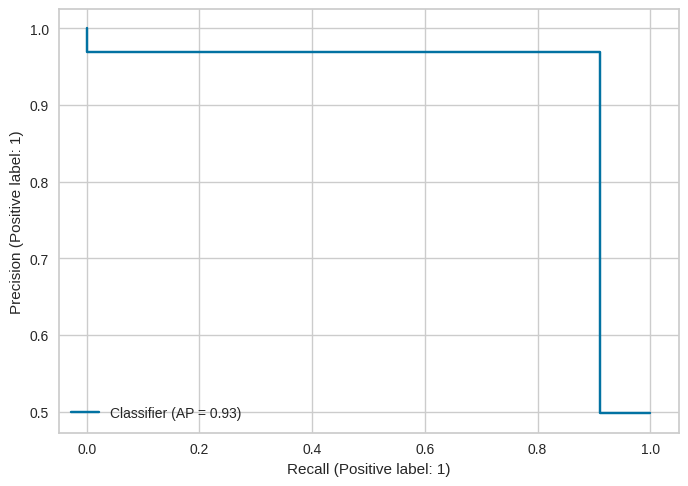

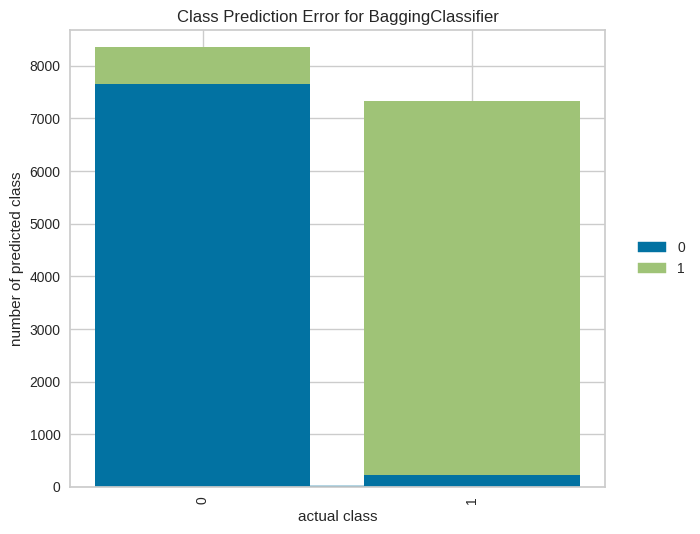

In [ ]:
evaluate_model(Bagging,X_train,X_test,y_train,y_test)


#plot the ROC,AUC Curves

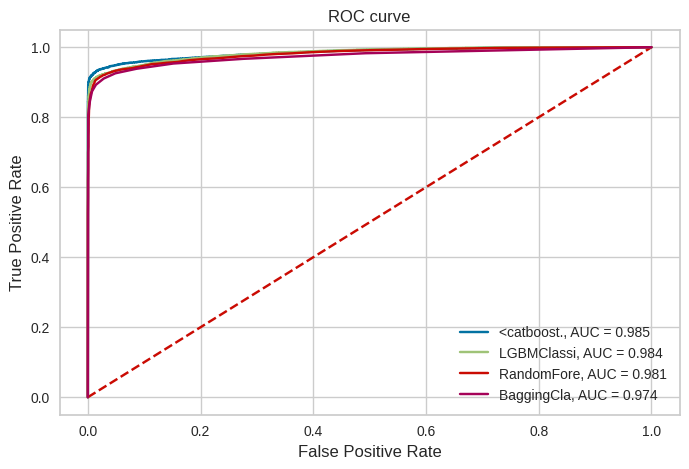

In [ ]:
def plot_roc_auc(models, X_test, y_test):
    """
    Function to plot ROC curves for different models.

    Parameters:
    - models: List of trained models
    - X_test: Test features
    - y_test: Test labels

    Returns:
    - None
    """

    fig = plt.figure(figsize=(8,5))  # Create a figure
    plt.plot([0, 1], [0, 1],'r--')  # Plot the diagonal line

    for model in models:  # Iterate over each model
        preds_proba = model.predict_proba(X_test)[:, 1]  # Predict probabilities for positive class
        fpr, tpr, _ = metrics.roc_curve(y_test, preds_proba)  # Compute ROC curve
        auc_score = roc_auc_score(y_test, preds_proba)  # Compute AUC score
        plt.plot(fpr, tpr, label=f'{str(model)[:10]}, AUC = {str(round(auc_score, 3))}')  # Plot ROC curve for the model

    plt.ylabel("True Positive Rate", fontsize=12)  # Set y-axis label
    plt.xlabel("False Positive Rate", fontsize=12)  # Set x-axis label
    plt.title("ROC curve")  # Set title
    plt.rcParams['axes.titlesize'] = 16  # Set title fontsize
    plt.legend()  # Show legend
    plt.show()  # Show the plot
models = [CB,LGBM,RF,Bagging]
plot_roc_auc(models, X_test, y_test)

#print table with all results

In [ ]:
models_list=["CatBoost","LGBM","RandomForest","Bagging"]
# Create a DataFrame to store model performance metrics, sorted by accuracy in descending order
model_res = pd.DataFrame({
    'Model': models_list,  # List of model objects
    'Accuracy': eval_accuracy_scores,  # List of accuracy scores
    'ROC-AUC': eval_roc_auc_scores  # List of ROC-AUC scores
}).sort_values('Accuracy', ascending=False).reset_index(drop=True)

model_res.head()

,Model,Accuracy,ROC-AUC
0,CatBoost,0.958294,0.958195
1,LGBM,0.949634,0.949483
2,RandomForest,0.946450,0.946328
3,Bagging,0.941293,0.941162


In [ ]:
models_list=["CatBoost","LGBM","RandomForest","Bagging"]
# Create a DataFrame to store model performance metrics, sorted by accuracy in descending order
model_res = pd.DataFrame({
    'Model': models_list,  # List of model objects
    'Accuracy': eval_accuracy_scores,  # List of accuracy scores
    'ROC-AUC': eval_roc_auc_scores  # List of ROC-AUC scores
}).sort_values('Accuracy', ascending=False).reset_index(drop=True)

model_res.head()

,Model,Accuracy,ROC-AUC
0,CatBoost,0.958294,0.958195
1,LGBM,0.949634,0.949483
2,RandomForest,0.946450,0.946328
3,Bagging,0.941293,0.941162


from matplotlib import pyplot as plt
_df_0['Accuracy'].plot(kind='hist', bins=20, title='Accuracy')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['ROC-AUC'].plot(kind='hist', bins=20, title='ROC-AUC')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_2.groupby('Model').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3.plot(kind='scatter', x='Accuracy', y='ROC-AUC', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4['Accuracy'].plot(kind='line', figsize=(8, 4), title='Accuracy')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_5['ROC-AUC'].plot(kind='line', figsize=(8, 4), title='ROC-AUC')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_6['Model'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_6, x='Accuracy', y='Model', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_7['Model'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_7, x='ROC-AUC', y='Model', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

#Start witht the transctions risk

#Import libraries

In [ ]:
# Install CatBoost library if not already installed
# CatBoost is a gradient boosting library that provides state-of-the-art results
# in terms of accuracy on a variety of problems including classification tasks.
# It handles categorical features efficiently without requiring extensive preprocessing.

!pip install catboost

import numpy as np  # Importing NumPy for numerical computations
import pandas as pd  # Importing Pandas for data manipulation and analysis
pd.set_option('display.max_rows',1000)  # Setting display options for Pandas to show maximum rows
import matplotlib.pyplot as plt  # Importing Matplotlib for data visualization
import seaborn as sns  # Importing Seaborn for statistical data visualization
%matplotlib inline
import os  # Importing os module for operating system dependent functionality
import zipfile  # Importing zipfile module for working with ZIP archives
from tqdm import tqdm  # Importing tqdm for displaying progress bar

# Importing required libraries for machine learning modeling
from sklearn.ensemble import RandomForestClassifier  # Random Forest classifier
from sklearn.model_selection import GridSearchCV  # Grid search for hyperparameter tuning
from sklearn.metrics import auc  # Area Under the Curve (AUC) metric
from imblearn.over_sampling import SMOTE  # Synthetic Minority Over-sampling Technique for handling imbalanced data
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_curve, precision_recall_curve, confusion_matrix  # Various evaluation metrics

# Importing machine learning models for classification tasks
from catboost import CatBoostClassifier  # CatBoost classifier
from xgboost import XGBClassifier  # XGBoost classifier
from sklearn.tree import DecisionTreeClassifier  # Decision Tree classifier
from sklearn.svm import SVC  # Support Vector Machine classifier


#Load and Unzip the dataset

In [ ]:
# Path to the ZIP file
zip_file_path = '/content/archive (1).zip'  # Define the path to the ZIP file
extract_dir = '/content/'  # Define the directory where the ZIP file will be extracted

# Create the extraction directory if it doesn't exist
os.makedirs(extract_dir, exist_ok=True)

# Open the ZIP file and get the total number of files
with zipfile.ZipFile(zip_file_path, 'r') as zf:
    total_files = len(zf.infolist())

# Open the ZIP file again for extraction
with zipfile.ZipFile(zip_file_path, 'r') as zf:
    # Extract files from the ZIP file while displaying progress
    for file in tqdm(zf.infolist(), desc="Extracting", total=total_files):
        zf.extract(file, extract_dir)

# Print a message indicating extraction is complete
print("Extraction complete.")

# Print additional message to indicate the completion of the extraction process
print("The Extraction process is complete until now with the main process.")


Extracting: 100%|██████████| 2/2 [00:29<00:00, 14.76s/it]

Extraction complete.
The Extraction process is complete until now with the main process.


#Read the train and the test dataset

In [ ]:
# Define the file paths for the training and testing datasets
train_path = "/content/fraudTrain.csv"  # Path to the training dataset
test_path = "/content/fraudTest.csv"  # Path to the testing dataset

# Load the training dataset into a DataFrame
data_train = pd.read_csv(train_path)

# Load the testing dataset into a DataFrame
data_test = pd.read_csv(test_path)


#Start Explore the dataset

#print the first 10 lines of the train data

In [ ]:
data_train.head(10)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0
5,5,2019-01-01 00:04:08,4767265376804500,"fraud_Stroman, Hudson and Erdman",gas_transport,94.63,Jennifer,Conner,F,4655 David Island,...,40.3750,-75.2045,2158,Transport planner,1961-06-19,189a841a0a8ba03058526bcfe566aab5,1325376248,40.653382,-76.152667,0
6,6,2019-01-01 00:04:42,30074693890476,fraud_Rowe-Vandervort,grocery_net,44.54,Kelsey,Richards,F,889 Sarah Station Suite 624,...,37.9931,-100.9893,2691,Arboriculturist,1993-08-16,83ec1cc84142af6e2acf10c44949e720,1325376282,37.162705,-100.153370,0
7,7,2019-01-01 00:05:08,6011360759745864,fraud_Corwin-Collins,gas_transport,71.65,Steven,Williams,M,231 Flores Pass Suite 720,...,38.8432,-78.6003,6018,"Designer, multimedia",1947-08-21,6d294ed2cc447d2c71c7171a3d54967c,1325376308,38.948089,-78.540296,0
8,8,2019-01-01 00:05:18,4922710831011201,fraud_Herzog Ltd,misc_pos,4.27,Heather,Chase,F,6888 Hicks Stream Suite 954,...,40.3359,-79.6607,1472,Public affairs consultant,1941-03-07,fc28024ce480f8ef21a32d64c93a29f5,1325376318,40.351813,-79.958146,0
9,9,2019-01-01 00:06:01,2720830304681674,"fraud_Schoen, Kuphal and Nitzsche",grocery_pos,198.39,Melissa,Aguilar,F,21326 Taylor Squares Suite 708,...,36.5220,-87.3490,151785,Pathologist,1974-03-28,3b9014ea8fb80bd65de0b1463b00b00e,1325376361,37.179198,-87.485381,0


#print the first 10 lines of the test data

In [ ]:
data_test.head(10)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0
5,5,2020-06-21 12:15:37,30407675418785,fraud_Daugherty LLC,kids_pets,19.55,Danielle,Evans,F,76752 David Lodge Apt. 064,...,42.1939,-76.7361,520,Psychotherapist,1991-10-13,798db04aaceb4febd084f1a7c404da93,1371816937,41.747157,-77.584197,0
6,6,2020-06-21 12:15:44,213180742685905,fraud_Romaguera Ltd,health_fitness,133.93,Kayla,Sutton,F,010 Weaver Land,...,40.5070,-123.9743,1139,"Therapist, occupational",1951-01-15,17003d7ce534440eadb10c4750e020e5,1371816944,41.499458,-124.888729,0
7,7,2020-06-21 12:15:50,3589289942931264,fraud_Reichel LLC,personal_care,10.37,Paula,Estrada,F,350 Stacy Glens,...,43.7557,-97.5936,343,"Development worker, international aid",1972-03-05,8be473af4f05fc6146ea55ace73e7ca2,1371816950,44.495498,-97.728453,0
8,8,2020-06-21 12:16:10,3596357274378601,"fraud_Goyette, Howell and Collier",shopping_pos,4.37,David,Everett,M,4138 David Fall,...,41.0001,-78.2357,3688,Advice worker,1973-05-27,71a1da150d1ce510193d7622e08e784e,1371816970,41.546067,-78.120238,0
9,9,2020-06-21 12:16:11,3546897637165774,fraud_Kilback Group,food_dining,66.54,Kayla,Obrien,F,7921 Robert Port Suite 343,...,31.6591,-96.8094,263,Barrister,1956-05-30,a7915132c7c4240996ba03a47f81e3bd,1371816971,31.782919,-96.366185,0


#print the data_train columns

In [ ]:
data_train.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

#print the test_data columns

In [ ]:
data_test.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

#print the types of the train columns

In [ ]:
data_train.dtypes

Unnamed: 0                 int64
trans_date_trans_time     object
cc_num                     int64
merchant                  object
category                  object
amt                      float64
first                     object
last                      object
gender                    object
street                    object
city                      object
state                     object
zip                        int64
lat                      float64
long                     float64
city_pop                   int64
job                       object
dob                       object
trans_num                 object
unix_time                  int64
merch_lat                float64
merch_long               float64
is_fraud                   int64
dtype: object

#print the types of the test_data columns

In [ ]:
data_test.dtypes

Unnamed: 0                 int64
trans_date_trans_time     object
cc_num                     int64
merchant                  object
category                  object
amt                      float64
first                     object
last                      object
gender                    object
street                    object
city                      object
state                     object
zip                        int64
lat                      float64
long                     float64
city_pop                   int64
job                       object
dob                       object
trans_num                 object
unix_time                  int64
merch_lat                float64
merch_long               float64
is_fraud                   int64
dtype: object

#print the count of null values of each column

In [ ]:
data_train.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

#print the columns of the train and the test data

In [ ]:
data_train.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

In [ ]:
data_test.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

# Visualize the distribution of the target variable (fraudulent or not)

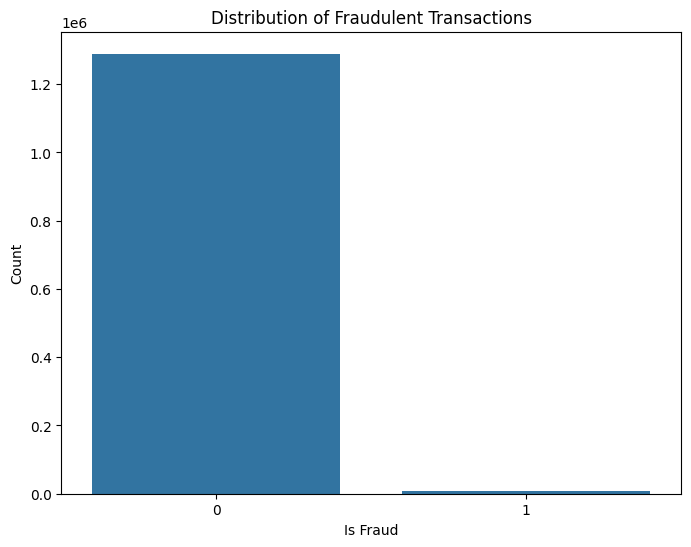

In [ ]:
# Create a figure with a specific size for the plot
plt.figure(figsize=(8, 6))

# Plot the count of fraudulent transactions using seaborn's countplot
sns.countplot(x='is_fraud', data=data_train)

# Set title and labels for the plot
plt.title('Distribution of Fraudulent Transactions')
plt.xlabel('Is Fraud')
plt.ylabel('Count')

# Show the plot
plt.show()


# Visualize the distribution of the target variable (fraudulent or not)

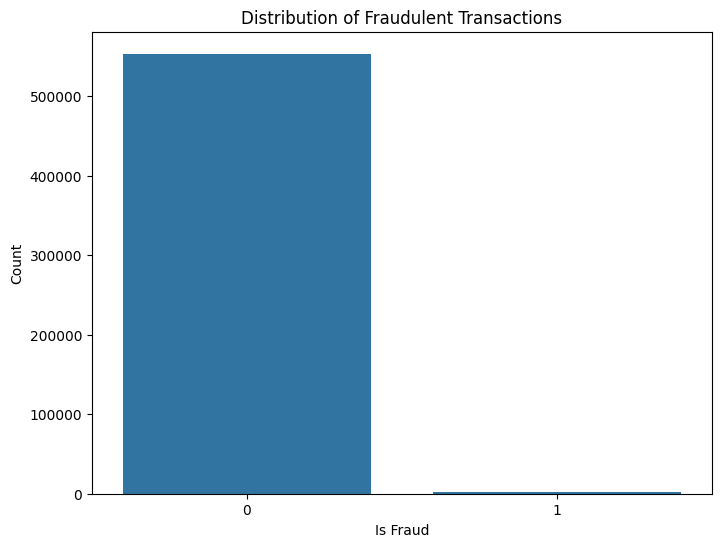

In [ ]:
# Create a figure with a specific size for the plot
plt.figure(figsize=(8, 6))

# Plot the count of fraudulent transactions in the test dataset using seaborn's countplot
sns.countplot(x='is_fraud', data=data_test)

# Set title and labels for the plot
plt.title('Distribution of Fraudulent Transactions')
plt.xlabel('Is Fraud')
plt.ylabel('Count')

# Show the plot
plt.show()


# Explore the correlation between numerical features

<ipython-input-15-4a4d29403a1c>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data_train.corr()


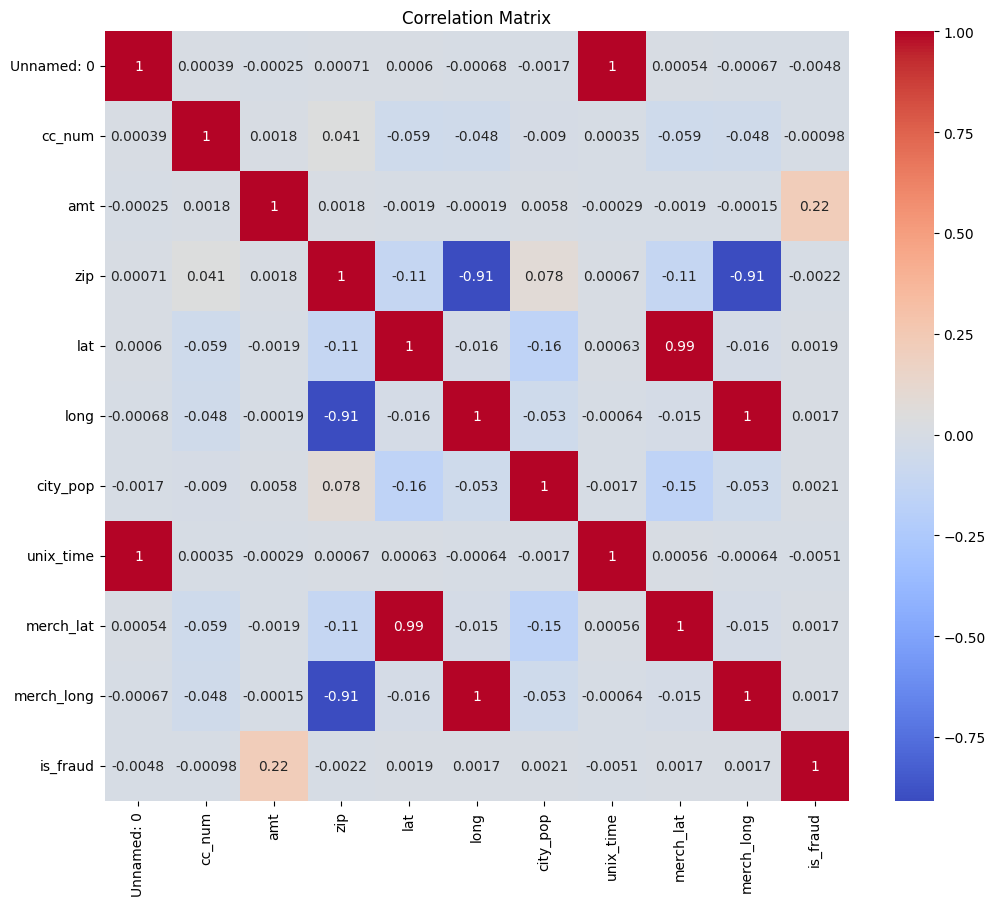

In [ ]:
# Compute the correlation matrix for the training dataset
corr_matrix = data_train.corr()

# Create a figure with a specific size for the plot
plt.figure(figsize=(12, 10))

# Plot the correlation matrix as a heatmap using seaborn's heatmap function
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

# Set title for the plot
plt.title('Correlation Matrix')

# Show the plot
plt.show()


# Explore the correlation between numerical features

<ipython-input-16-89cb2844355b>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data_test.corr()


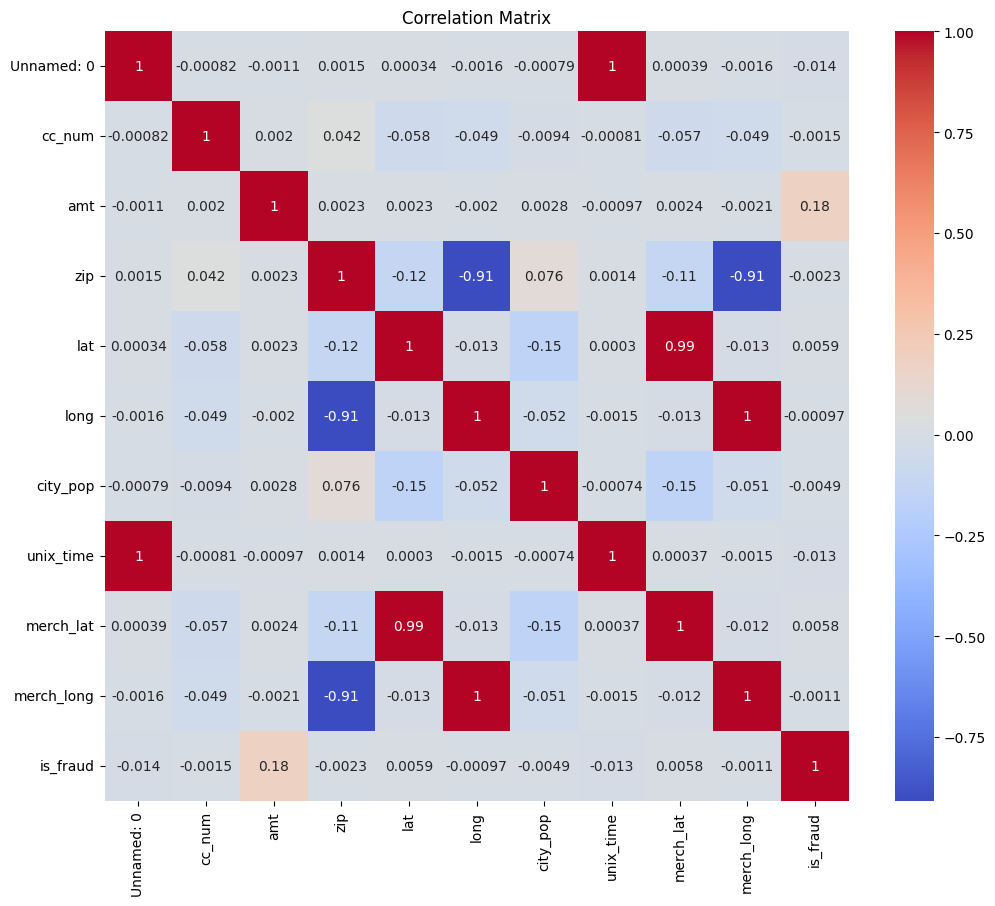

In [ ]:
# Compute the correlation matrix for the testing dataset
corr_matrix = data_test.corr()

# Create a figure with a specific size for the plot
plt.figure(figsize=(12, 10))

# Plot the correlation matrix as a heatmap using seaborn's heatmap function
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

# Set title for the plot
plt.title('Correlation Matrix')

# Show the plot
plt.show()


# Explore categorical features (gender) train data

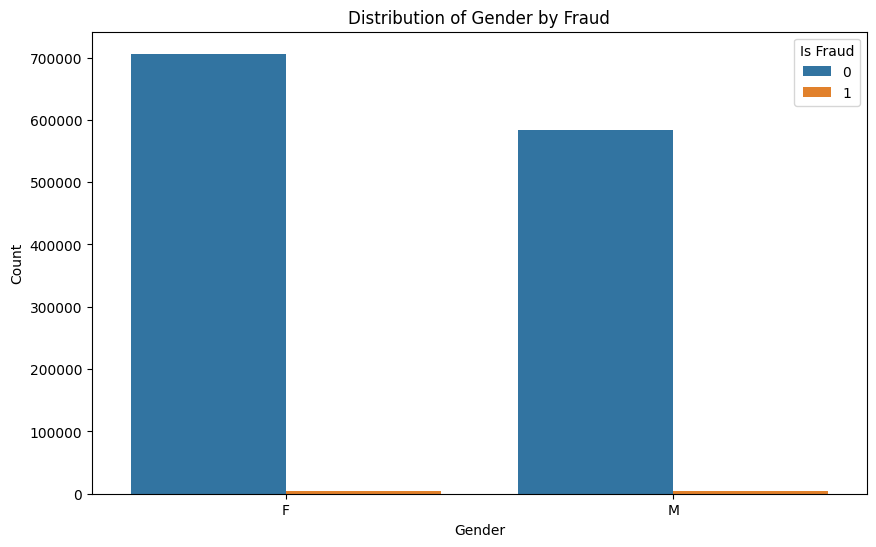

In [ ]:
# Create a figure with a specific size for the plot
plt.figure(figsize=(10, 6))

# Plot the count of gender by fraud using seaborn's countplot with hue
sns.countplot(x='gender', hue='is_fraud', data=data_train)

# Set title and labels for the plot
plt.title('Distribution of Gender by Fraud')
plt.xlabel('Gender')
plt.ylabel('Count')

# Add legend with title
plt.legend(title='Is Fraud')

# Show the plot
plt.show()


# Explore categorical features (gender) test data

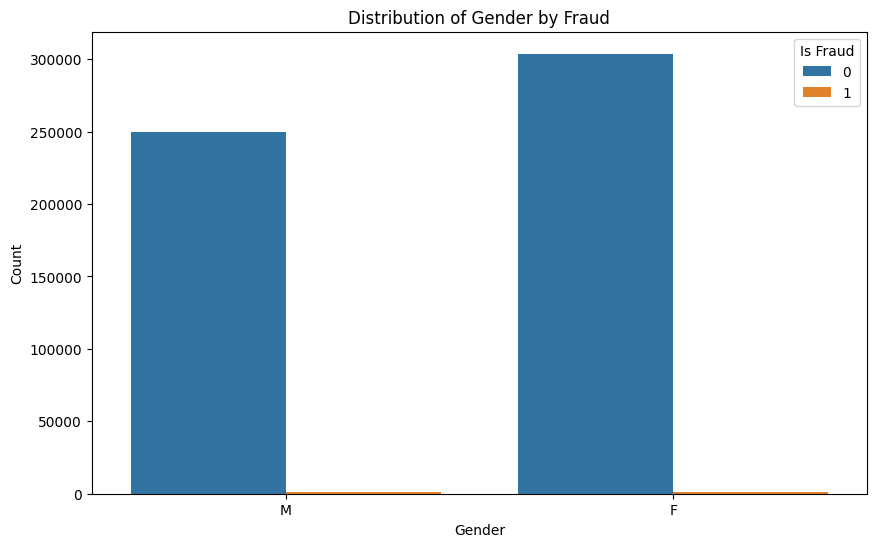

In [ ]:
# Create a figure with a specific size for the plot
plt.figure(figsize=(10, 6))

# Plot the count of gender by fraud in the test dataset using seaborn's countplot with hue
sns.countplot(x='gender', hue='is_fraud', data=data_test)

# Set title and labels for the plot
plt.title('Distribution of Gender by Fraud')
plt.xlabel('Gender')
plt.ylabel('Count')

# Add legend with title
plt.legend(title='Is Fraud')

# Show the plot
plt.show()


# Explore categorical features (category) train data


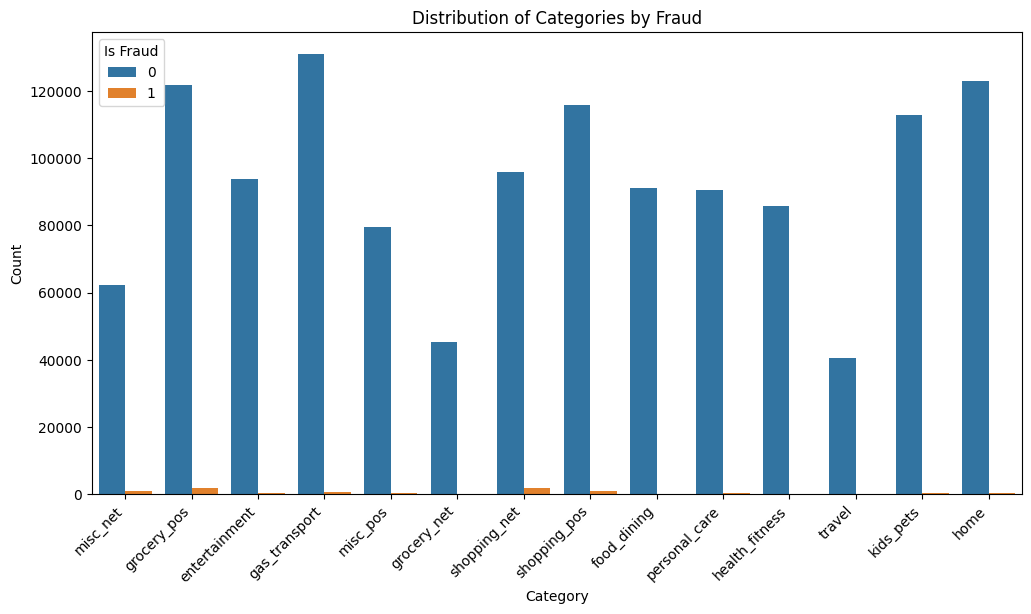

In [ ]:
# Create a figure with a specific size for the plot
plt.figure(figsize=(12, 6))

# Plot the count of categories by fraud using seaborn's countplot with hue
sns.countplot(x='category', hue='is_fraud', data=data_train)

# Set title and labels for the plot
plt.title('Distribution of Categories by Fraud')
plt.xlabel('Category')
plt.ylabel('Count')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha="right")

# Add legend with title
plt.legend(title='Is Fraud')

# Show the plot
plt.show()

# Explore categorical features (category) test data


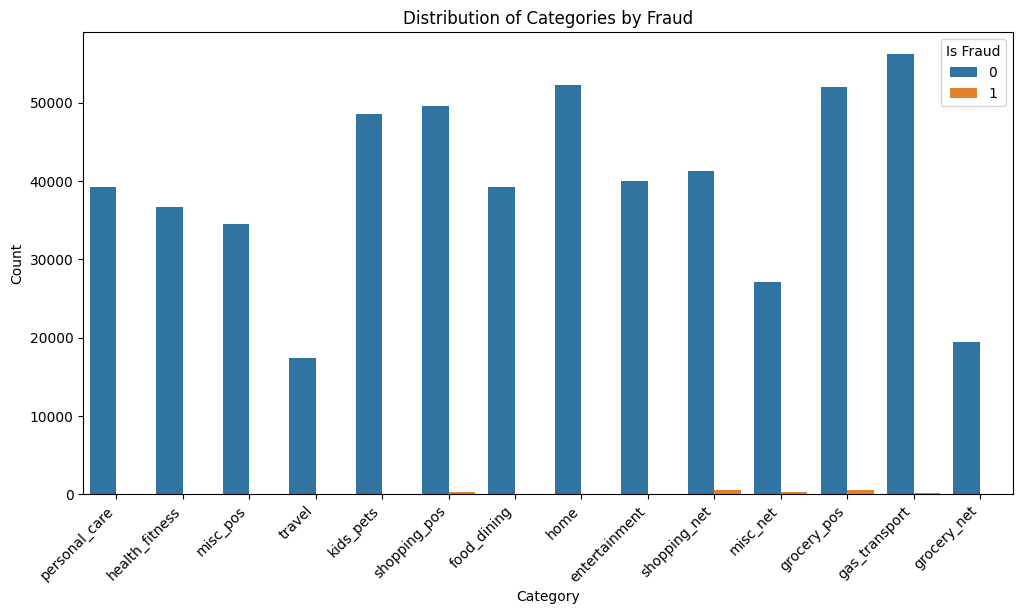

In [ ]:
# Create a figure with a specific size for the plot
plt.figure(figsize=(12, 6))

# Plot the count of categories by fraud in the test dataset using seaborn's countplot with hue
sns.countplot(x='category', hue='is_fraud', data=data_test)

# Set title and labels for the plot
plt.title('Distribution of Categories by Fraud')
plt.xlabel('Category')
plt.ylabel('Count')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha="right")

# Add legend with title
plt.legend(title='Is Fraud')

# Show the plot
plt.show()


# Transaction Frequency by Card Number train data

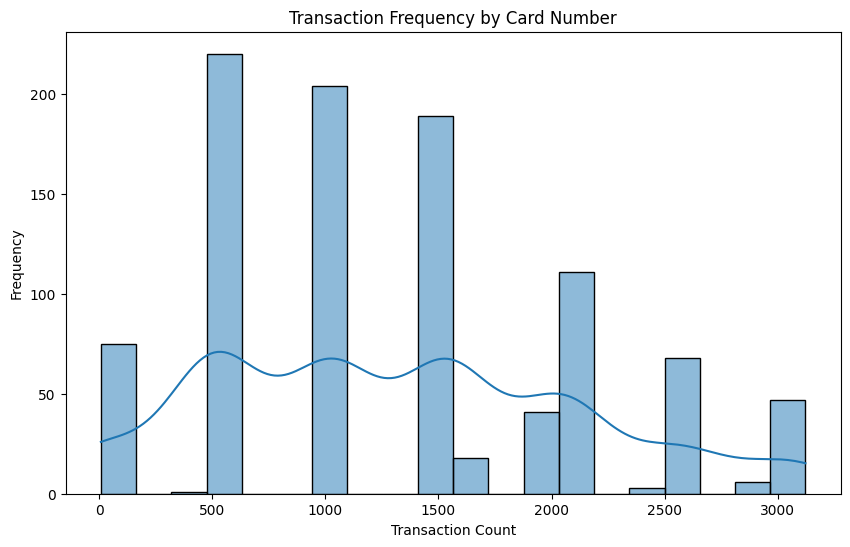

In [ ]:
# Count the number of transactions per card number in the training dataset
card_transaction_counts = data_train['cc_num'].value_counts()

# Create a figure with a specific size for the plot
plt.figure(figsize=(10, 6))

# Plot the histogram of transaction frequency by card number using seaborn's histplot
sns.histplot(card_transaction_counts, bins=20, kde=True)

# Set title and labels for the plot
plt.title('Transaction Frequency by Card Number')
plt.xlabel('Transaction Count')
plt.ylabel('Frequency')

# Show the plot
plt.show()


# Transaction Frequency by Card Number test data


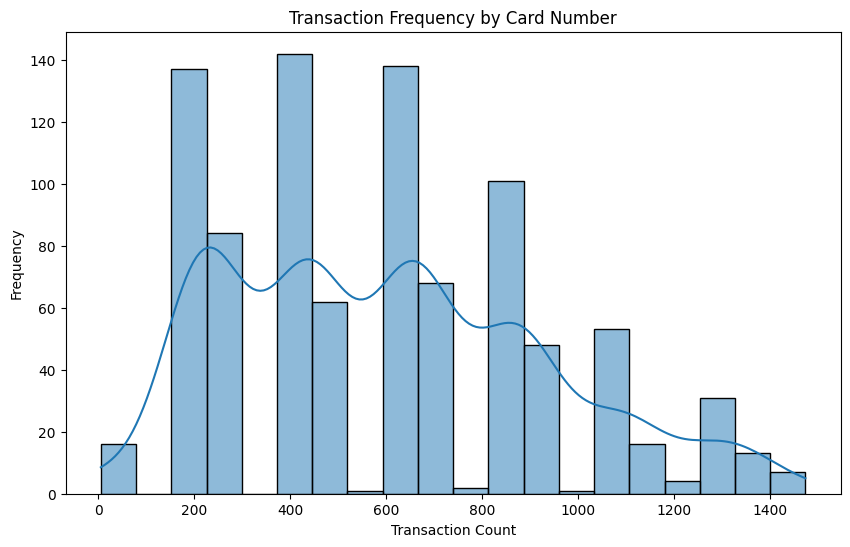

In [ ]:
# Count the number of transactions per card number in the testing dataset
card_transaction_counts = data_test['cc_num'].value_counts()

# Create a figure with a specific size for the plot
plt.figure(figsize=(10, 6))

# Plot the histogram of transaction frequency by card number in the test dataset using seaborn's histplot
sns.histplot(card_transaction_counts, bins=20, kde=True)

# Set title and labels for the plot
plt.title('Transaction Frequency by Card Number')
plt.xlabel('Transaction Count')
plt.ylabel('Frequency')

# Show the plot
plt.show()


#Start preprocessing

# Dropping Unnamed column

In [ ]:
data_train.drop("Unnamed: 0",axis=1,inplace=True)
data_test.drop("Unnamed: 0",axis=1,inplace=True)
data_train.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


# Time analysis: Extract hours and days and month from 'trans_date_trans_time' for the train data

In [ ]:
data_train['trans_hour'] = pd.to_datetime(data_train['trans_date_trans_time']).dt.hour
data_train['trans_day'] = pd.to_datetime(data_train['trans_date_trans_time']).dt.dayofweek
data_train['trans_month'] = pd.to_datetime(data_train['trans_date_trans_time']).dt.month


# Time analysis: Extract hours and days and month from 'trans_date_trans_time' for the test data

In [ ]:
data_test['trans_hour'] = pd.to_datetime(data_test['trans_date_trans_time']).dt.hour
data_test['trans_day'] = pd.to_datetime(data_test['trans_date_trans_time']).dt.dayofweek
data_test['trans_month'] = pd.to_datetime(data_test['trans_date_trans_time']).dt.month

#Calculate the age_at_trans which is the person age when doing the transction

In [ ]:
data_train['trans_date_trans_time']=pd.to_datetime(data_train['trans_date_trans_time'])
data_test['trans_date_trans_time']=pd.to_datetime(data_test['trans_date_trans_time'])

#Calclulate the age_at_trans for the train

In [ ]:
data_train['dob'] = pd.to_datetime(data_train['dob'])
data_train['age_at_trans'] = (data_train['trans_date_trans_time'] - data_train['dob']).dt.days // 365

#Calclulate the age_at_trans for the test

In [ ]:
data_test['dob'] = pd.to_datetime(data_test['dob'])
data_test['age_at_trans'] = (data_test['trans_date_trans_time'] - data_test['dob']).dt.days // 365

#Calculate the lat_dist which is the distination between the  Latitude Location of Merchant and the Latitude Location of Credit Card Holder ,the long_dist distination which is between the  Longitude Location of Merchant and the Longitude Location of Credit Card Holder for the trian and the test dataset

In [ ]:
data_train['lat_dist'] = abs(round(data_train['merch_lat']-data_train['lat'],3))
data_train['long_dist'] = abs(round(data_train['merch_long']-data_train['long'],3))

data_test['lat_dist'] = abs(round(data_test['merch_lat']-data_test['lat'],3))
data_test['long_dist'] = abs(round(data_test['merch_long']-data_test['long'],3))

data_train[['merch_lat','lat','lat_dist','merch_long','long','long_dist']].head()

,merch_lat,lat,lat_dist,merch_long,long,long_dist
0,36.011293,36.0788,0.068,-82.048315,-81.1781,0.870
1,49.159047,48.8878,0.271,-118.186462,-118.2105,0.024
2,43.150704,42.1808,0.970,-112.154481,-112.2620,0.108
3,47.034331,46.2306,0.804,-112.561071,-112.1138,0.447
4,38.674999,38.4207,0.254,-78.632459,-79.4629,0.830


#keep only the relevent features for the train and the test

In [ ]:
features_to_keep = [ 'amt', 'city_pop','is_fraud','gender', 'category',"age_at_trans",	"lat_dist",	"long_dist"	,"trans_month" ]
data_train= data_train[features_to_keep]
data_test= data_test[features_to_keep]

#Encoding the categorical features

#encoding using Binary mapping on Gender

In [ ]:

data_train['gender']  = data_train['gender'].map({'M': 1, 'F': 0})
data_test['gender']   =  data_test['gender'].map({'M': 1, 'F': 0})

# Creating dummy variables for Category

In [ ]:
data_train = pd.get_dummies(data_train,columns=['category'],drop_first=True)
data_test = pd.get_dummies(data_test,columns=['category'],drop_first=True)

In [ ]:
data_train.head()

,amt,city_pop,is_fraud,gender,age_at_trans,lat_dist,long_dist,trans_month,category_food_dining,category_gas_transport,...,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel
0,4.97,3495,0,0,30,0.068,0.870,1,0,0,...,0,0,0,0,1,0,0,0,0,0
1,107.23,149,0,0,40,0.271,0.024,1,0,0,...,1,0,0,0,0,0,0,0,0,0
2,220.11,4154,0,1,56,0.970,0.108,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,45.00,1939,0,1,52,0.804,0.447,1,0,1,...,0,0,0,0,0,0,0,0,0,0
4,41.96,99,0,1,32,0.254,0.830,1,0,0,...,0,0,0,0,0,1,0,0,0,0


#Scaling the numerical columns

In [ ]:
from sklearn.preprocessing import StandardScaler

# Define the columns to be scaled
columns_to_scale = ['amt', 'city_pop', 'age_at_trans', 'lat_dist', 'long_dist']

# Initialize the StandardScaler
scaler = StandardScaler()
data_train[columns_to_scale] = scaler.fit_transform(data_train[columns_to_scale])


#Plot the data after the scaling

In [ ]:
data_train.head()

,amt,city_pop,is_fraud,gender,age_at_trans,lat_dist,long_dist,trans_month,category_food_dining,category_gas_transport,...,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel
0,-0.407826,-0.282589,0,0,-0.891968,-1.497948,1.279686,1,0,0,...,0,0,0,0,1,0,0,0,0,0
1,0.230039,-0.293670,0,0,-0.317551,-0.794479,-1.648963,1,0,0,...,1,0,0,0,0,0,0,0,0,0
2,0.934149,-0.280406,0,1,0.601517,1.627812,-1.358175,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,-0.158132,-0.287742,0,1,0.371750,1.052561,-0.184638,1,0,1,...,0,0,0,0,0,0,0,0,0,0
4,-0.177094,-0.293835,0,1,-0.777085,-0.853390,1.141216,1,0,0,...,0,0,0,0,0,1,0,0,0,0



# Apply the same scaler to the test dataset


In [ ]:
data_test[columns_to_scale] = scaler.transform(data_test[columns_to_scale])


# Splitting train and test dataset into X and y

In [ ]:
X_train = data_train.drop(['is_fraud'],axis=1)
y_train = data_train['is_fraud']

X_test = data_test.drop(['is_fraud'],axis=1)
y_test = data_test['is_fraud']

# Generating synthetic data to balance the imbalanced dataset


In [ ]:
smote = SMOTE(random_state=42)
x_train_resample, y_train_resample = smote.fit_resample(X_train,y_train)
x_test_resample, y_test_resmaple = smote.fit_resample(X_test,y_test)


# Count occurrences of each label after balancing

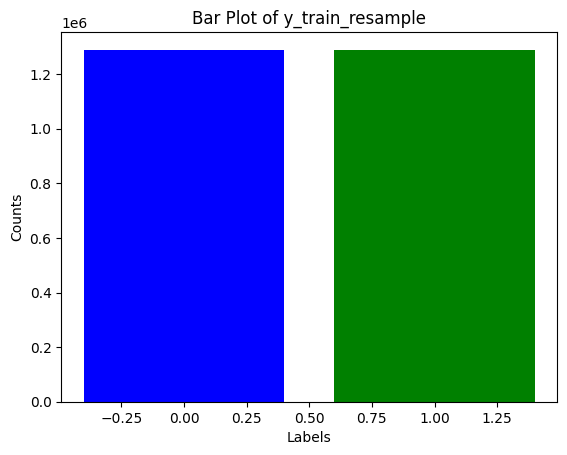

In [ ]:
label_counts = np.unique(y_train_resample, return_counts=True)

# Extract labels and counts
labels = label_counts[0]
counts = label_counts[1]

# Plotting
plt.bar(labels, counts, color=['blue', 'green'])  # You can specify colors for each bar
plt.xlabel('Labels')
plt.ylabel('Counts')
plt.title('Bar Plot of y_train_resample')
plt.show()

#The data set is  very big about 2 million samples ,so for fit the model we will use 1,00,000 for train and 300,000 for test

In [ ]:
x_train_resample=x_train_resample[:1000000]
y_train_resample=y_train_resample[:1000000]
X_test=x_test_resample[:300000]
y_test=y_test_resmaple[:300000]

#Define Models

In [ ]:
# Random Forest
rf =RandomForestClassifier(n_estimators=10, max_depth=5, max_features=12, min_samples_leaf=100, random_state=1, oob_score=True)
rf.fit(x_train_resample, y_train_resample)
rf_preds = rf.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_preds)

# CatBoost
catboost = CatBoostClassifier(random_state=1, silent=True)
catboost.fit(x_train_resample, y_train_resample)
catboost_preds = catboost.predict(X_test)
catboost_accuracy = accuracy_score(y_test, catboost_preds)

# XGBoost
xgb = XGBClassifier(random_state=1)
xgb.fit(x_train_resample, y_train_resample)
xgb_preds = xgb.predict(X_test)
xgb_accuracy = accuracy_score(y_test, xgb_preds)


# Decision Tree
dt = DecisionTreeClassifier(random_state=1)
dt.fit(x_train_resample, y_train_resample)
dt_preds = dt.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_preds)


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


# Plot Confusion Matrix for each model

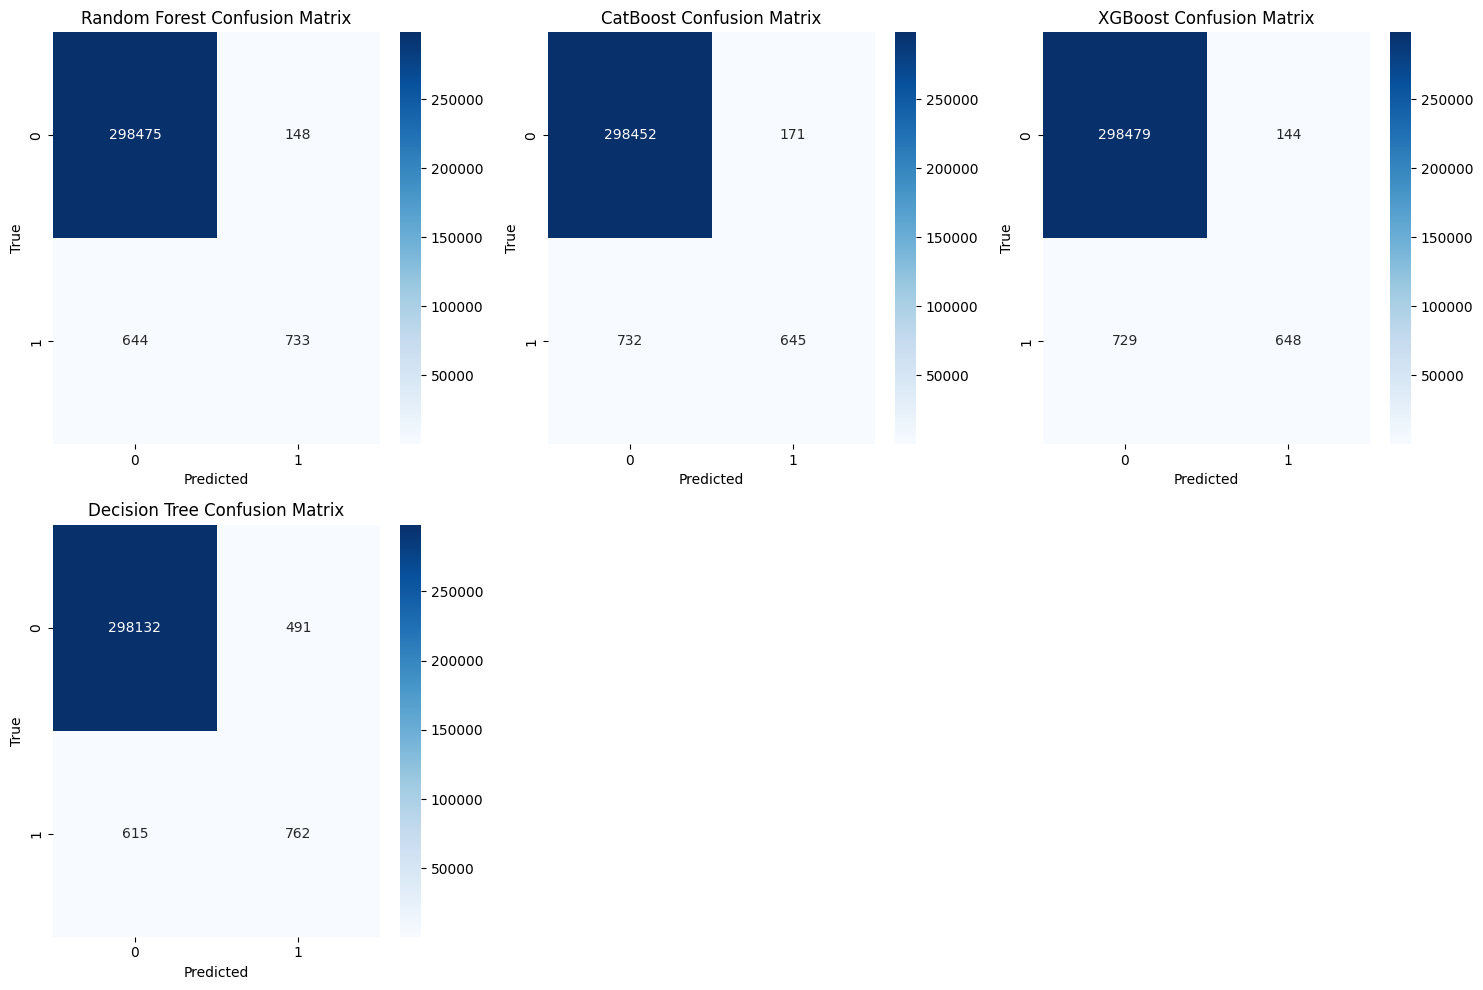

In [ ]:
models = [rf, catboost, xgb, dt]
model_names = [ 'Random Forest','CatBoost', 'XGBoost', 'Decision Tree']
plt.figure(figsize=(15, 10))
for i, model in enumerate(models):
    cm = confusion_matrix(y_test, model.predict(X_test))
    plt.subplot(2, 3, i+1)
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
    plt.title(model_names[i] + ' Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')

plt.tight_layout()
plt.show()


# Print metrics

In [ ]:
print()
print("Random Forest Metrics:")
print("Accuracy:", rf_accuracy)
print()
print("CatBoost Metrics:")
print("Accuracy:", catboost_accuracy)
print()
print("XGBoost Metrics:")
print("Accuracy:", xgb_accuracy)
print()
print("Decision Tree Metrics:")
print("Accuracy:", dt_accuracy)
print()


Random Forest Metrics:
Accuracy: 0.99736

CatBoost Metrics:
Accuracy: 0.99699

XGBoost Metrics:
Accuracy: 0.99709

Decision Tree Metrics:
Accuracy: 0.9963133333333334



# Plot Area under Curve (AUC curve) for each model

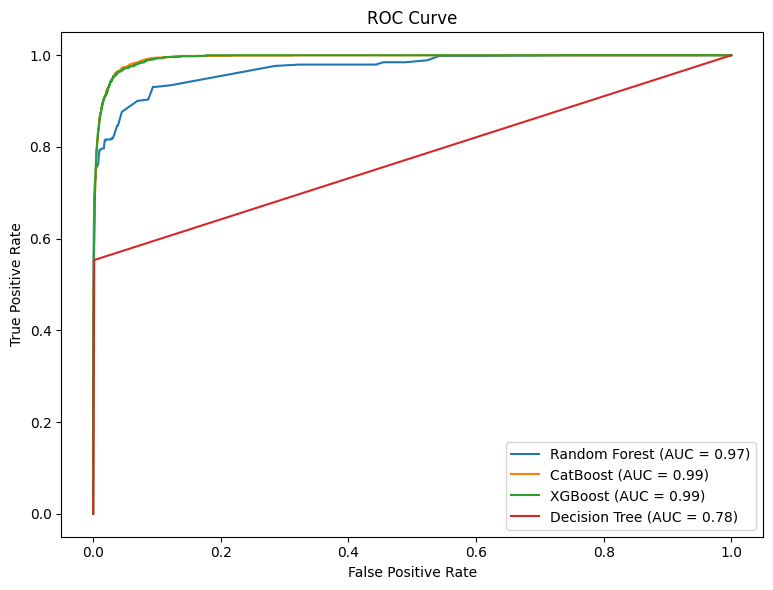

In [ ]:

models = [rf,catboost, xgb, dt]
model_names = [ 'Random Forest','CatBoost', 'XGBoost', 'Decision Tree']
plt.figure(figsize=(15, 6))

for i, model in enumerate(models):
    y_scores = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_scores)
    precision, recall, _ = precision_recall_curve(y_test, y_scores)
    roc_auc = auc(fpr, tpr)
    pr_auc = auc(recall, precision)
    plt.subplot(1, 2, 1)
    plt.plot(fpr, tpr, label=f'{model_names[i]} (AUC = {roc_auc:.2f})')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend()


plt.tight_layout()
plt.show()


#print the feature importance based the Random forest model

In [ ]:
imp_df = pd.DataFrame({
    "Varname": X_train.columns,
    "Imp": rf.feature_importances_
})

In [ ]:
imp_df.sort_values(by="Imp", ascending=False)

,Varname,Imp
0,amt,0.573595
10,category_grocery_pos,0.282202
8,category_gas_transport,0.080336
15,category_misc_pos,0.011558
2,gender,0.011392
14,category_misc_net,0.010556
17,category_shopping_net,0.009306
19,category_travel,0.007739
3,age_at_trans,0.006694
18,category_shopping_pos,0.003410
